# Lab 6: Random number generation in python


_Please make sure you submit your lab before the deadline and work on your lab only during your lab time. It is against course policy to submit labs after the lab section time or to work on labs before the particular lab section time has begun (this can get you 0 points)._

__Important__: you can only use the python packages in the first code cell for this lab.

__Important__: _for full credit, you should not use any loops (for, while etc) to solve these problems, rather you should use methods from pandas (otherwise you will lose 25% credit even if autograde gives you full points)._

__Important for this lab__: 

Not all of the questions in this lab are autograded, so make sure a TA looks at your notebook before you leave. While TAs will provide you with technical assistance for these questions, you have only two opportunities to ask if your "plot is correct". 

The documentation here will be useful: 
+ https://plotnine.readthedocs.io/en/stable/api.html

+ https://pandas.pydata.org/pandas-docs/stable/reference/frame.html

+ https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html

In [1]:
# Run this cell. You cannot use any other packages
import numpy as np
import pandas as pd
from plotnine import *

## Q1 (1+1+1+1+1+1)

a) Use the numpy function random.normal to simulate  1000 times from the standard normal distribution (i.e. the normal distribution with mean 0 and standard deviation 1). Store the result in column x of a dataframe df (you can add columns to df to use in ggplot later if you want). Calculate the mean, standard deviation, minimum and maximum, storing them in variables mn_n01, std_n01, min_n01, max_n01.

In [2]:
###
### YOUR CODE HERE
###
df = pd.DataFrame()
df['x'] = np.random.normal(0,1,1000)
mn_n01 = df['x'].mean()
std_n01 = df['x'].std()
min_n01 = df['x'].min()
max_n01 = df['x'].max()

mn_n01, std_n01, min_n01, max_n01

(-0.04487424667089213,
 1.0146433461143347,
 -3.896564646583094,
 2.900145472469745)

In [3]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


b) Use the ggplot geom_density layer to plot the density of these points. 

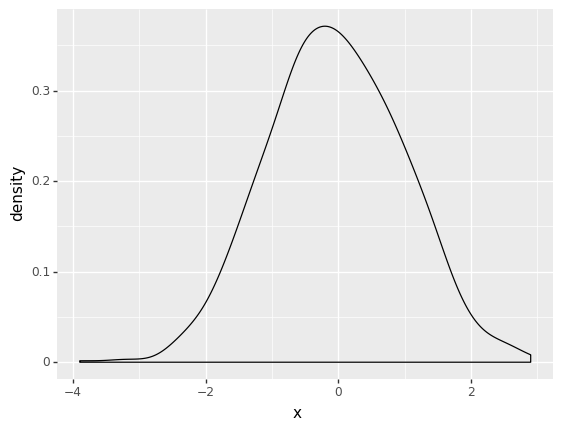

<ggplot: (7550627161)>

In [4]:
###
### YOUR CODE HERE
###

ggplot() + geom_density(df,aes(x='x'))


c) Generate another 1000 samples from the normal distribution, now with mean 5 and standard deviation 2. You can store these however you like. Report the sample mean and standard deviation, minimum and maximum, and store them in variables mn_n52, std_n52 min_n52, std_n52. 

In [5]:
###
### YOUR CODE HERE
###

df['x_52'] = np.random.normal(5,2,1000)
mn_n52 = df['x_52'].mean()
std_n52 = df['x_52'].std()
min_n52 = df['x_52'].min()
max_n52 = df['x_52'].max()

df_melt = pd.melt(df)

mn_n52, std_n52, min_n52, std_n52

(4.955103249081479,
 1.9321666039920458,
 -0.6798677700348632,
 1.9321666039920458)

In [6]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


d) Create a plot showing two densities, the one from part a, along with the density of the new set of points. These should be colored differently, and your plot should label which is which.

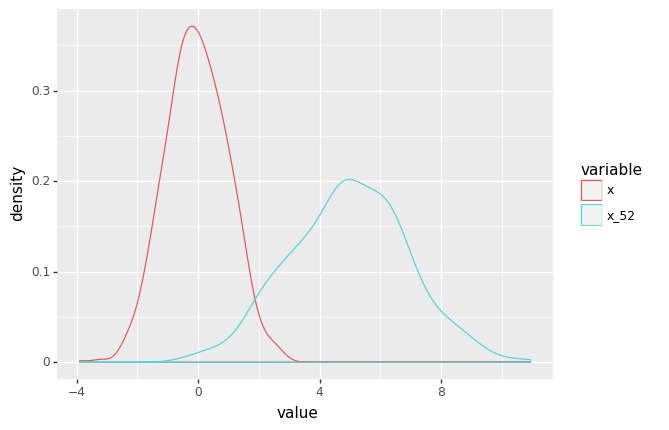

<ggplot: (279223421)>

In [7]:
###
### YOUR CODE HERE
###

ggplot(df_melt,aes(x='value', color='variable')) + \
    geom_density()


e) Generate a 1000 samples from the standard Cauchy distribution, using the function random.standard_cauchy. Report the sample mean, standard deviation, minimum and maximum values you get in variables mn_c, std_c, min_c, max_c (note: the Cauchy is strange probability density without a mean or standard deviation, so you can get surprising numbers). 

In [8]:
###
### YOUR CODE HERE
###

df['x_c'] = np.random.standard_cauchy(1000)
mn_c = df['x_c'].mean()
std_c = df['x_c'].std()
min_c = df['x_c'].min()
max_c = df['x_c'].max()

df_melt = pd.melt(df)

mn_c, std_c, min_c, max_c

(2.3215510421437355, 48.36798742215595, -86.5555810017078, 1429.6594663807264)

f) Create a plot showing three densities, those from part a and b, along with the density of the new set of points. Your plot should color them differently, and label which is which (the cauchy can produce very extreme values, so add '+ xlim(-100,100)' to your ggplot object to set the x-limits).

/opt/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_density : Removed 5 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


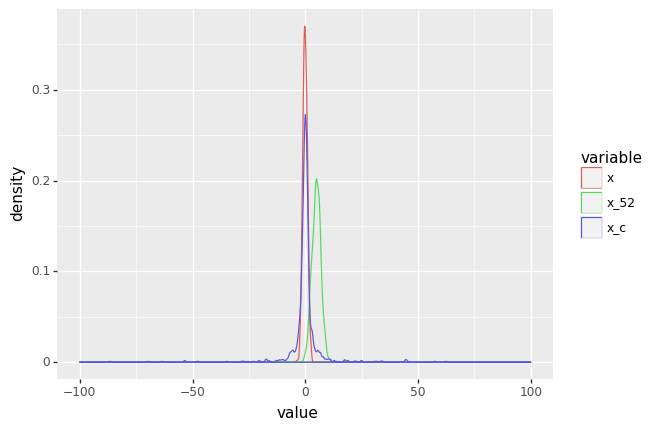

<ggplot: (7552798877)>

In [9]:
###
### YOUR CODE HERE
###


ggplot(df_melt,aes(x='value', color='variable')) + \
    geom_density() + xlim(-100,100)

## Q2: Law of large numbers (1+1+1+1+1+2+1)

Consider the mean of N samples from the standard normal distribution. The _law of large numbers_ says (among other things) that mean of N samples from some distribution becomes closer and closer to the true (population) mean as N increases.
The next 2 questions will look at this.

First, run the cell below:

In [10]:
# Run this cell to create a dataframe with a column of standard Guassians.
np.random.seed(10)   # Set a seed so everyone gets the same random numbers
N = 1000
df = pd.DataFrame({'x':np.random.normal(0,1,N)})

a) Add two columns to the dataframe df created above. The first, called 'len' is the sequence of integers (1,2,...,N). The second, called mn, calculates a running average of the elements of column x. Thus element m of mn is the mean of the first m elements of column x.


To caclulate the running average without a for-loop, use the cumsum() method, which calculates a running sum (i.e. the mth element of df.x.cumsum() calculates the sum of the first m elements of column x). Use this running sum to get a running average.

E.g.
if df.x is [.1,.3,.2,-.4], then df.len should be [1,2,3,4] and df.mn should be [.1,.2,.2,.05]

In [11]:
###
### YOUR CODE HERE
###
df['len'] = df.index+1
df['mn'] = df.x.cumsum()/df['len']
df

,x,len,mn
0,1.331587,1,1.331587
1,0.715279,2,1.023433
2,-1.545400,3,0.167155
3,-0.008384,4,0.123270
4,0.621336,5,0.222883
...,...,...,...
995,-1.014339,996,-0.015982
996,-0.331828,997,-0.016298
997,1.440697,998,-0.014839
998,-0.390218,999,-0.015214


In [12]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


b) Create a ggplot line-plot with geom_line, with 'len' on the x-axis and 'mn' on the y-axis. This will show you how the mean evolves as you average more and more samples.

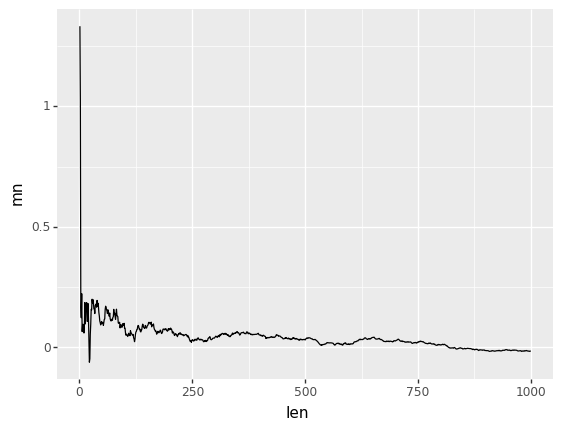

<ggplot: (7551618845)>

In [13]:
###
### YOUR CODE HERE
###
ggplot() + geom_line(df,aes(x='len',y='mn'))


The above plot shows a single sequence of running averages. To better understand these random paths, it helps to look at a collection of these. Thus, we want to create a plot with M such lines on top of each other. We will do this without using a for-loop.

First run the cell below to create a dataframe with N rows and M columns, each element being with a sample from a normal distribution. 

In [14]:
np.random.seed(10)   # Set a seed so everyone gets the same random numbers

N = 50
M = 100
gs = pd.DataFrame(np.random.normal(0,1,[N,M]))

d) Like before, create a new dataframe gs2, each column being a _running total_ of the corresponding column in
gs. You should not use any for loops.

In [15]:
###
### YOUR CODE HERE
###
gs2 = gs.copy()
gs2 = gs2.cumsum()
gs2

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,1.331587,0.715279,-1.545400,-0.008384,0.621336,-0.720086,0.265512,0.108549,0.004291,-0.174600,...,1.107708,0.244544,-0.061912,-0.753893,0.711959,0.918269,-0.482093,0.089588,0.826999,-1.954512
1,1.449062,-1.192178,-2.468310,0.461368,0.476969,-1.120224,-0.030472,0.956757,0.711122,-0.961869,...,1.461186,0.037264,-1.141609,-0.876963,0.320977,2.173443,0.465033,-0.932723,1.994167,-2.526489
2,1.582200,0.010566,-3.493063,0.621767,-0.653506,-3.061524,0.956126,0.984985,-0.111246,-2.548421,...,0.603663,-0.327014,-0.637683,-0.688632,1.406204,2.530382,0.672363,-1.077788,2.158071,-1.696976
3,2.337500,0.890052,-3.733019,-0.073290,-1.124906,-2.712047,2.567583,1.224324,0.373757,-4.207026,...,0.829790,-0.442894,-0.226080,-0.400821,1.910475,3.334649,-0.358246,-2.435485,1.891569,-1.868269
4,2.799885,-0.329804,-3.540446,0.362160,-2.759850,-2.277110,3.965402,1.348991,-0.517694,-4.783919,...,0.066185,0.037894,-1.057879,0.192368,1.461696,3.822345,-0.301931,-1.889701,1.208447,-2.527287
5,4.239139,1.052343,-2.619126,-0.210727,-1.484801,-2.605942,3.819061,2.407427,-0.628775,-4.822800,...,-2.749816,0.147439,-0.915210,-0.591667,1.719307,5.135268,-1.650956,-1.389564,0.223860,-1.041307
6,4.809832,0.539468,-2.343343,-0.600008,-0.836272,-2.630370,5.127549,5.070005,-0.286049,-3.950170,...,-3.273990,-0.271135,-0.977126,-1.650516,3.524553,5.061245,0.553929,-1.841653,0.014424,-1.335991
7,5.716325,1.538722,-2.027959,0.537791,0.321825,-1.630610,4.711100,3.926228,-1.912495,-5.408959,...,-3.879094,0.012796,0.119995,-2.189093,5.720149,4.358601,0.493330,-1.624425,-1.510610,-0.878100
8,5.737368,1.695094,-0.990305,0.583457,1.429161,-2.968399,4.457433,5.181108,-1.993041,-6.629802,...,-3.566824,0.169511,-1.385032,-1.711947,6.291157,4.612670,0.252091,-3.541312,-1.409415,-0.984902
9,5.271384,1.762861,-1.214771,0.655195,1.312399,-3.438258,3.348225,3.942649,-1.651653,-6.666769,...,-3.174690,-1.725083,-1.726544,-1.642174,6.130800,3.598331,-0.079737,-2.100614,-1.799633,-0.342452


In [16]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


e) Create a new dataframe gs3, each of whose columns gives a running average of the corresponding column in gs2. After this, add a new column 'len', set to the sequence of integers 1 to N.

Hint: the div() method, when passed a pandas series, divides each row or column of a dataframe by that series.

In [17]:
###
### YOUR CODE HERE
###
gs3 = gs2.copy()
gs3 = gs3.div(gs3.index+1, axis=0)
gs3['len'] = gs3.index+1
gs3


,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,len
0,1.331587,0.715279,-1.545400,-0.008384,0.621336,-0.720086,0.265512,0.108549,0.004291,-0.174600,...,0.244544,-0.061912,-0.753893,0.711959,0.918269,-0.482093,0.089588,0.826999,-1.954512,1
1,0.724531,-0.596089,-1.234155,0.230684,0.238485,-0.560112,-0.015236,0.478379,0.355561,-0.480935,...,0.018632,-0.570805,-0.438481,0.160488,1.086721,0.232516,-0.466362,0.997083,-1.263244,2
2,0.527400,0.003522,-1.164354,0.207256,-0.217835,-1.020508,0.318709,0.328328,-0.037082,-0.849474,...,-0.109005,-0.212561,-0.229544,0.468735,0.843461,0.224121,-0.359263,0.719357,-0.565659,3
3,0.584375,0.222513,-0.933255,-0.018322,-0.281227,-0.678012,0.641896,0.306081,0.093439,-1.051756,...,-0.110724,-0.056520,-0.100205,0.477619,0.833662,-0.089561,-0.608871,0.472892,-0.467067,4
4,0.559977,-0.065961,-0.708089,0.072432,-0.551970,-0.455422,0.793080,0.269798,-0.103539,-0.956784,...,0.007579,-0.211576,0.038474,0.292339,0.764469,-0.060386,-0.377940,0.241689,-0.505457,5
5,0.706523,0.175390,-0.436521,-0.035121,-0.247467,-0.434324,0.636510,0.401238,-0.104796,-0.803800,...,0.024573,-0.152535,-0.098611,0.286551,0.855878,-0.275159,-0.231594,0.037310,-0.173551,6
6,0.687119,0.077067,-0.334763,-0.085715,-0.119467,-0.375767,0.732507,0.724286,-0.040864,-0.564310,...,-0.038734,-0.139589,-0.235788,0.503508,0.723035,0.079133,-0.263093,0.002061,-0.190856,7
7,0.714541,0.192340,-0.253495,0.067224,0.040228,-0.203826,0.588887,0.490779,-0.239062,-0.676120,...,0.001599,0.014999,-0.273637,0.715019,0.544825,0.061666,-0.203053,-0.188826,-0.109762,8
8,0.637485,0.188344,-0.110034,0.064829,0.158796,-0.329822,0.495270,0.575679,-0.221449,-0.736645,...,0.018835,-0.153892,-0.190216,0.699017,0.512519,0.028010,-0.393479,-0.156602,-0.109434,9
9,0.527138,0.176286,-0.121477,0.065520,0.131240,-0.343826,0.334822,0.394265,-0.165165,-0.666677,...,-0.172508,-0.172654,-0.164217,0.613080,0.359833,-0.007974,-0.210061,-0.179963,-0.034245,10


In [18]:
# ### AUTOGRADER TEST - DO NOT REMOVE
###


f) Create a ggplot plot showing each column (i.e. each running average) as a line with a different color.

You might want to use the melt method. You want to melt all columns except 'len' (we discussed how in class)

(if you want to remove the legend for the hundred lines, you can add 'guides(color=False)' to the ggplot object)

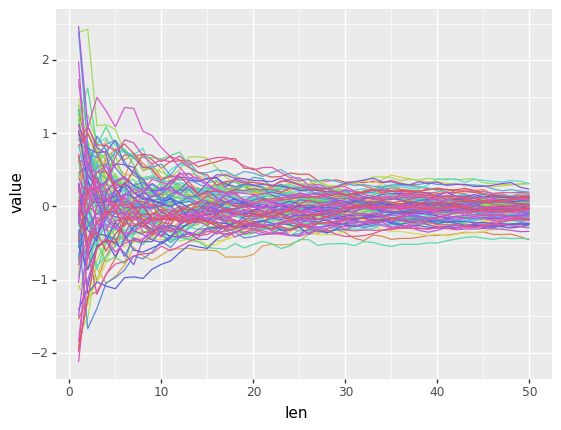

<ggplot: (7551618921)>

In [19]:
###
### YOUR CODE HERE
###



gs3_melt = gs3.melt(id_vars='len',value_vars=gs3.columns[0:-1])
gs3_melt
ggplot(gs3_melt) + \
    geom_line(aes(x='len',y='value', color='variable')) + guides(color=False)

g) We want to plot M running averages again, now with samples from the Cauchy distribution. The cell below generates an NxM dataframe of independent Cauchy variables called chy. Repeat what you did to gs2 to generate a similar plot, now for the Cauchy variables.

(unlike the Gaussian case which converges licely to the population mean, the Cauchy distribution is 'heavy-tailed'. Every now and then it will produce a very large value, which will cause your running average to jump away from 0.

In [20]:
np.random.seed(10)
N = 50
M = 100
chy = pd.DataFrame(np.random.standard_cauchy([N,M]))

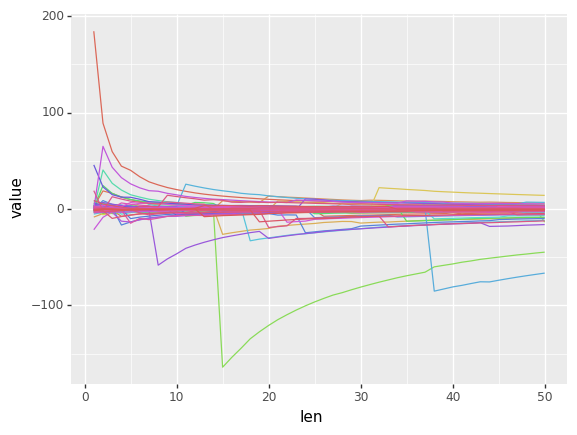

<ggplot: (7551619029)>

In [21]:
###
### YOUR CODE HERE
###

gs2 = chy.copy()
gs2 = gs2.cumsum()
gs2

gs3 = gs2.copy()
gs3 = gs3.div(gs3.index+1, axis=0)
gs3['len'] = gs3.index+1
gs3

gs3_melt = gs3.melt(id_vars='len',value_vars=gs3.columns[0:-1])

ggplot(gs3_melt) + \
    geom_line(aes(x='len',y='value', color='variable')) + guides(color=False)


## Q3 Central limit theorem (1+1+1+1+2)

If you add up N  independent random variables, their sum will have a larger and larger spread as N increases.
If you add N independent random variables and divide by N (i.e. average them), this average will usually stabilize to a number (the population mean, if it exists). This is the law of large numbers we saw earlier.

Finally, if you sum up N independent random variables and divide by the _square root of N_, the result will neither blow up nor stabilize to a number: instead this quantity will stabilize to random variable whose density is the Gaussian. This is the central limit theorem. We will explore this below.

a) Set N = 10000. Simulate N times from the uniform distribution on [-1,+1] using the function random.uniform. Store this in column 'u1' of a dataframe called 'clt'

In [22]:
###
### YOUR CODE HERE
###
clt = pd.DataFrame()
clt['u1'] = np.random.uniform(-1,1,10000)


b) Create a ggplot plot showing the density of u1.

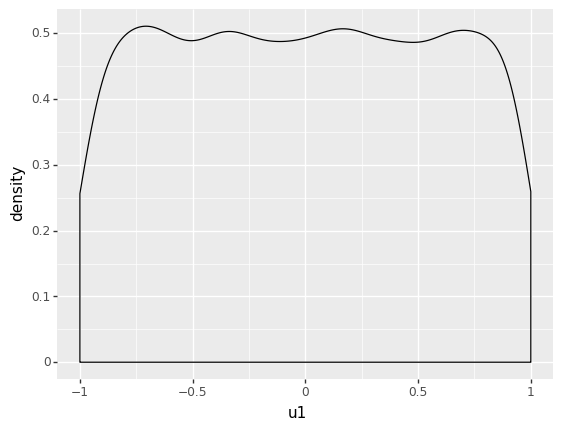

<ggplot: (7551625465)>

In [23]:
###
### YOUR CODE HERE
###

ggplot() + geom_density(clt,aes(x='u1'))

c) Let u3 be obtained by adding 3 uniform(-1,1) random variables and then dividing by the square root of 3. We want to simulate u3 N times. To do this without a for-loop, first simulate an Nx3 matrix of uniform(-1,1) numbers, add up the columns and divide by square root 3.

Store this in a column 'u3' of clt.

In [24]:
###
### YOUR CODE HERE
###
one = np.random.uniform(-1,1,10000)
two = np.random.uniform(-1,1,10000)
three = np.random.uniform(-1,1,10000)

u3 = (one+two+three)/np.sqrt(3)
clt['u3'] = u3

d) Create a ggplot plot showing two densities, of 'u1' and 'u3'. These should be colored differently on the same plot. Your plot should indicate which is which.

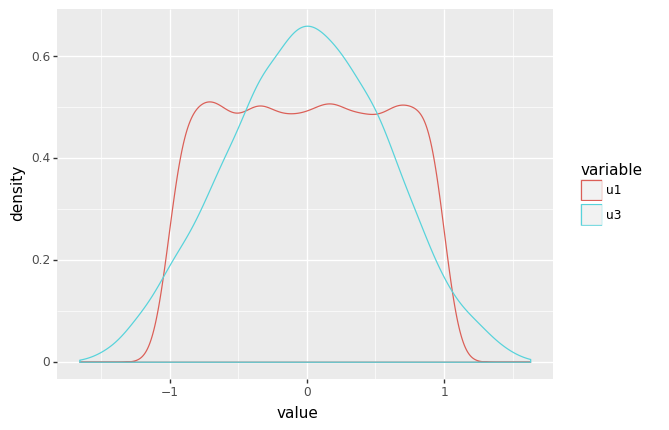

<ggplot: (7551206317)>

In [25]:
###
### YOUR CODE HERE
###
clt_melt = pd.melt(clt)

ggplot(clt_melt,aes(x='value', color='variable')) + \
    geom_density()

e) Add a column u5 to clt, each element being the sum of 5 unif(-1,1) variables. Create a ggplot plot showing three densities, 'u1','u3' and 'u5'. These should be colored differently on the same plot. Your plot should indicate which is which.

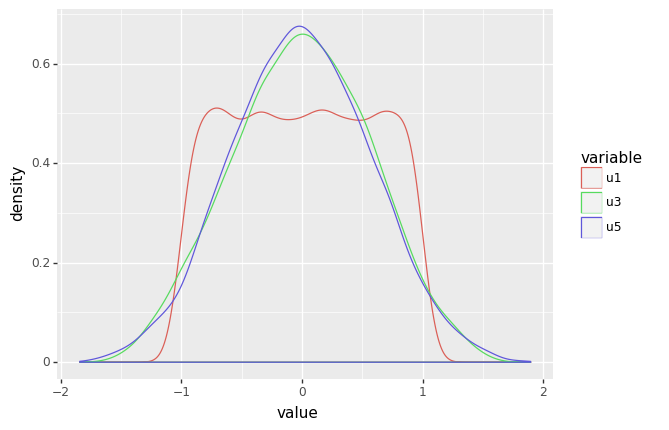

<ggplot: (7552810469)>

In [26]:
###
### YOUR CODE HERE
###
one = np.random.uniform(-1,1,10000)
two = np.random.uniform(-1,1,10000)
three = np.random.uniform(-1,1,10000)
four = np.random.uniform(-1,1,10000)
five = np.random.uniform(-1,1,10000)

u5 = (one+two+three+four+five)/np.sqrt(5)
clt['u5'] = u5


clt_melt = pd.melt(clt)

ggplot(clt_melt,aes(x='value', color='variable')) + \
    geom_density()
